In [ ]:
# look for relationships within the data

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv("netflix_data.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [11]:
# working with dates

df = pd.read_csv("netflix_data.csv", parse_dates=['date_added'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [13]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4812 non-null   object        
 1   type          4812 non-null   object        
 2   title         4812 non-null   object        
 3   director      4812 non-null   object        
 4   cast          4812 non-null   object        
 5   country       4812 non-null   object        
 6   date_added    4812 non-null   datetime64[ns]
 7   release_year  4812 non-null   int64         
 8   duration      4812 non-null   int64         
 9   description   4812 non-null   object        
 10  genre         4812 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 413.7+ KB


In [14]:
df['date_added_month'] = df['date_added'].dt.month
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,date_added_month
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas,12
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies,12
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action,11
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas,1
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,1,A genetics professor experiments with a treatm...,International TV,7


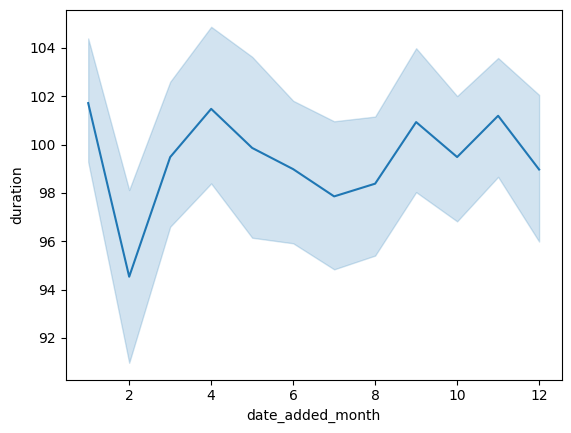

In [15]:
# visualize data over time

sns.lineplot(data=df, x='date_added_month', y='duration')
plt.show()

In [19]:
# correlations

df.select_dtypes('int').corr()

,release_year,duration,date_added_month
release_year,1.000000,-0.220071,-0.035352
duration,-0.220071,1.000000,0.001936
date_added_month,-0.035352,0.001936,1.000000


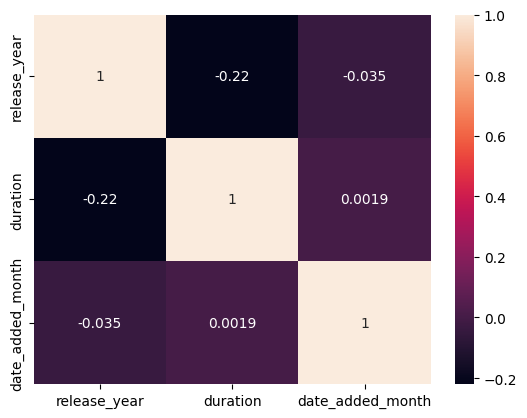

In [20]:
sns.heatmap(df.select_dtypes('int').corr(), annot=True)
plt.show()

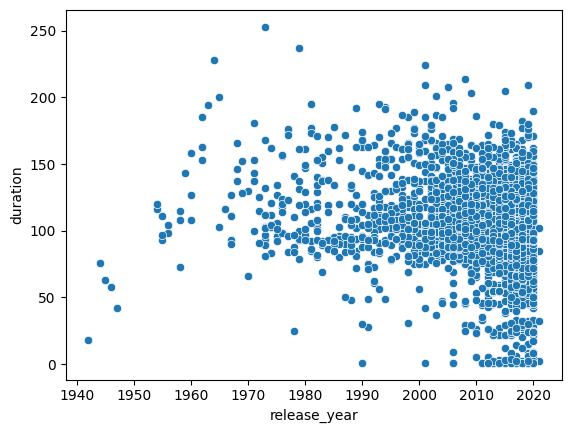

In [21]:
# scatter plots

sns.scatterplot(data=df, x='release_year', y='duration')
plt.show()

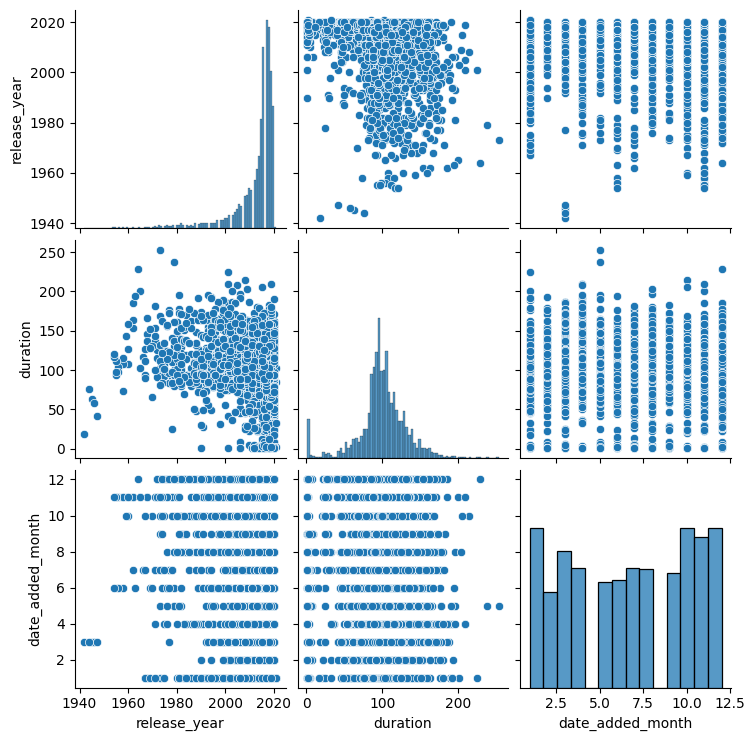

In [22]:
sns.pairplot(data=df)
plt.show()

In [25]:
# distributions

df['type'].value_counts()

type
Movie      4677
TV Show     135
Name: count, dtype: int64

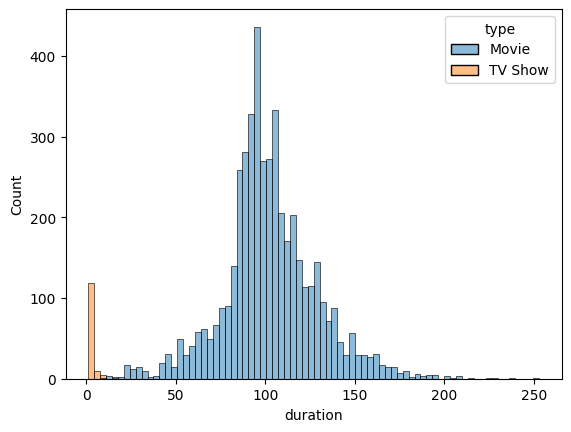

In [26]:
sns.histplot(data=df, x='duration', hue='type')
plt.show()

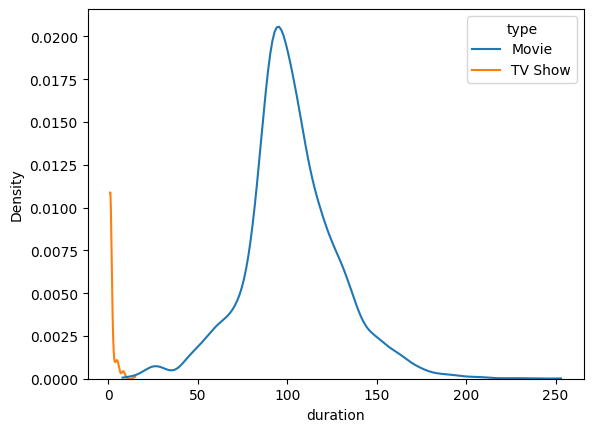

In [28]:
# visualized distributions

sns.kdeplot(data=df, x='duration', hue='type', cut=0)
plt.show()

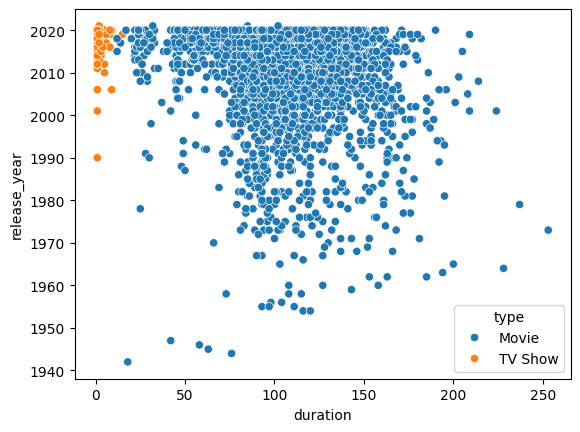

In [29]:
sns.scatterplot(data=df, x='duration', y='release_year', hue='type')
plt.show()